Least Square Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
tr_path = './train.csv'
test_path = './test.csv'
data = pd.read_csv(tr_path)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


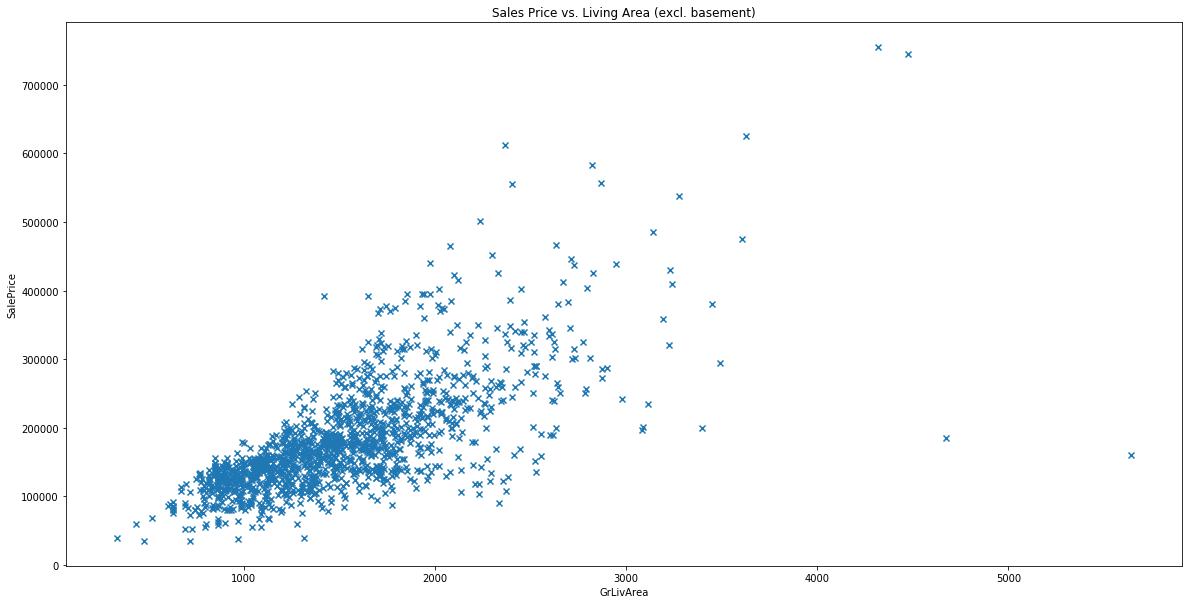

In [4]:
Y = data['SalePrice']
X = data['GrLivArea']

plt.scatter(X, Y, marker = "x")


plt.title("Sales Price vs. Living Area (excl. basement)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice");

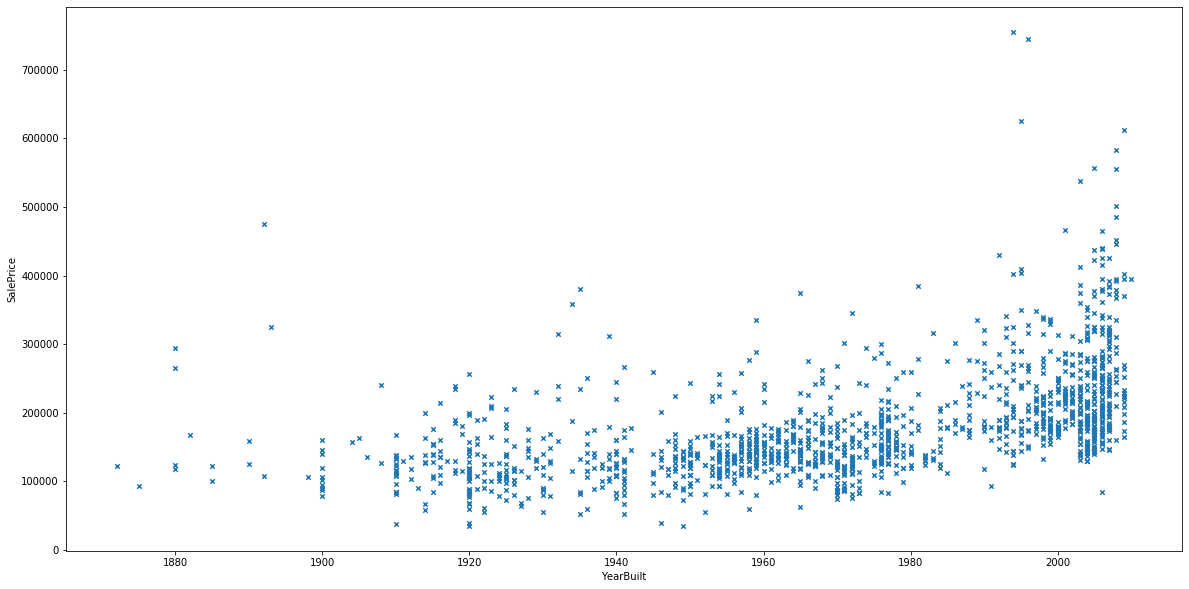

In [5]:
data.plot('YearBuilt', 'SalePrice', kind = 'scatter', marker = 'x');

In [10]:
def read_to_df(file_path):
    
    df = pd.read_csv(file_path)
    return df

In [8]:
def select_columns(data_frame, column_names):
     return df[column_names]

In [6]:
def column_cutoff(data_frame, cutoffs):
    data = data_frame
    for col in cutoffs:
        data = data.loc[data[col[0]] >= col[1],:]
        data = data.loc[data[col[0]] <= col[2],:]
    return data 

$$w_{LS} = (X^T X)^{−1}X^T y,$$

In [7]:
def least_squares_weights(input_x, target_y): 
    if input_x.shape[0] < input_x.shape[1]:
        input_x = np.transpose(input_x)        
    if target_y.shape[0] < target_y.shape[1]:
        target_y = np.transpose(target_y)        
    ones = np.ones((len(target_y), 1), dtype=int)    
    x_ones = np.concatenate((ones, input_x), axis=1)    
    x_products = np.matmul(np.linalg.inv(np.matmul(np.transpose(x_ones), 
                                                        x_ones)),
                                np.transpose(x_ones))
    w_ls = np.matmul(x_products, target_y)       
    return w_ls

In [11]:
df = read_to_df(tr_path)
df_sub = select_columns(df, ['SalePrice', 'GrLivArea', 'YearBuilt'])

cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
df_sub_cutoff = column_cutoff(df_sub, cutoffs)

X = df_sub_cutoff['GrLivArea'].values
Y = df_sub_cutoff['SalePrice'].values

### reshaping for input into function
training_y = np.array([Y])
training_x = np.array([X])

weights = least_squares_weights(training_x, training_y)
print(weights)

[[13454.06670576]
 [  110.78992341]]


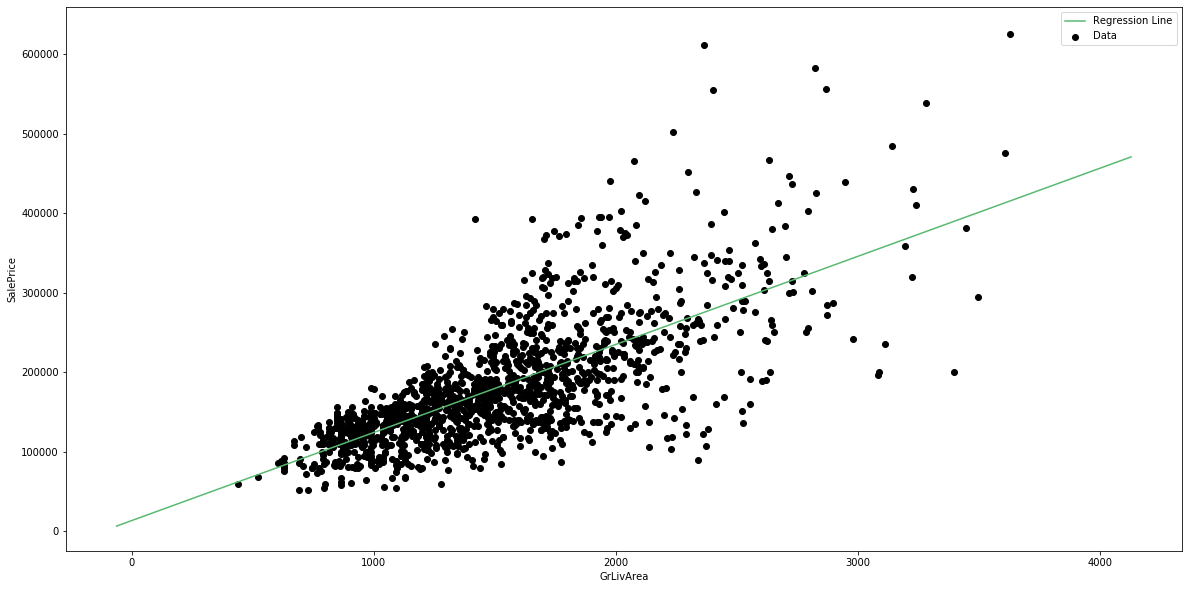

In [12]:
#provided
max_X = np.max(X) + 500
min_X = np.min(X) - 500


reg_x = np.linspace(min_X, max_X, 1000)


reg_y = weights[0][0] + weights[1][0] * reg_x

plt.plot(reg_x, reg_y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='k', label='Data')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

In [13]:
#provided
rmse = 0

b0 = weights[0][0]
b1 = weights[1][0]

for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(Y))
print(rmse)
ss_t = 0
ss_r = 0

mean_y = np.mean(Y)

for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

53092.48486948662
0.5163484562864966


In [14]:
#provided
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

### sklearn requires a 2-dimensional X and 1 dimensional y. The below yields shapes of:
### skl_X = (n,1); skl_Y = (n,)
skl_X = df_sub_cutoff[['GrLivArea']]
skl_Y = df_sub_cutoff['SalePrice']

lr.fit(skl_X,skl_Y)
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

Intercept: 13454.066705758654
Coefficient: [110.78992341]
